<a href="https://colab.research.google.com/github/LeeHome2/gachon-ml-2025/blob/main/HW1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

201933505 이호민
# **기계학습 프로그래밍 과제 1**

> **학생 성적 예측 모델 만들기**
Kaggle의 학생 수학 성적 데이터를 활용하여 최종 성적(`G3`)을 예측하는 모델입니다.


<br>

1. **데이터 준비**: Kaggle 데이터셋 (student-mat.csv)
2. **데이터 전처리**: 결측치 처리, 이상치 처리, 범주형 인코딩, 스케일링
3. **모델 학습**: 서로 다른 3개의 회귀 알고리즘 적용 및 성능 비교
4. **성능 평가**: RMSE, MAE, R² 지표 계산 및 그래프 시각화
5. **예측 결과 확인**: 실제 vs 예측값 비교
6. 모델 저장 및 불러오기 구현


# 0. 라이브러리 준비

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


# 1. 데이터 불러오기

In [ ]:
import kagglehub
path = kagglehub.dataset_download("serkanp/student-mat")

# 데이터 파일 경로 확인
print(os.listdir(path))

# CSV 불러오기
df = pd.read_csv(os.path.join(path, "student-mat.csv"), sep=",")
print(df.shape)

Using Colab cache for faster access to the 'student-mat' dataset.
['student-mat.csv']
(395, 33)


  데이터 정보
  자료 출처 : kaggle
  Gabriel Pereira 학교 학생 395명의 성적 데이터
 G1 : 1번째 시험 성적
 G2 : 2번째 시험 성적
성별, 나이, 거주지, 가족규모 등 범주형 데이터 포함 33개의 컬럼

In [ ]:
pd.set_option('display.max_columns', None) # display 옵션을 통한 전체 열 확장

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# 2. 데이터 전처리하기

In [ ]:

# 타겟 변수(G3)를 제외한 특징(feature)와 레이블(label) 분리
X = df.drop("G3", axis=1)
y = df["G3"]

# 범주형 변수 처리 (원핫 인코딩)
categorical_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. 모델 학습
**1) 선형 회귀 (Linear Regression)**


입력 변수와 목표 변수(G3 점수) 간의 관계를 선형 함수로 모델링 기본적인 회귀 알고리즘.
각 변수에 가중치를 곱해 더해서 성적을 예측한다.


단순하고 해석이 용이하다.


<br>

**2. 릿지 회귀 (Ridge Regression)**

L2 정규화를 적용하여 회귀계수를 제약함으로써 과적합(overfitting)을 방지한다.

다중공선성(multicollinearity)이 존재할 때도 안정적인 성능을 낼 수 있다.

<br>

**3. 라쏘 회귀 (Lasso Regression)**

L1 정규화를 적용하여 불필요한 변수의 회귀계수를 0으로 만들 수 있다.

성적 예측에 기여하지 않는 변수를 줄이고 모델 해석력을 높이는 장점이 있다.

따라서 Ridge와 비교하여 정규화 방식에 따른 성능 차이를 분석하기 위해 포함하였다.




In [ ]:

# 모델 정의
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42)
}


results = {}


# 4. 성능 지표 출력



**1. RMSE (Root Mean Squared Error, 평균 제곱근 오차)**

오차를 제곱해서 평균 낸 뒤, 제곱근을 씌운 값

큰 오차에 더 민감하게 반응함 → “큰 예측 실수”를 잘 잡아줌

값이 작을수록 모델 성능이 좋음


**2. MAE (Mean Absolute Error, 평균 절대 오차)**

실제값과 예측값의 차이를 절대값으로 계산해 평균 낸 값

값이 작을수록 예측이 실제와 가깝다는 의미

직관적으로 “평균적으로 몇 점 정도 오차가 나는가”를 보여줌


**3. R² (결정계수, Coefficient of Determination)**

모델이 실제 데이터를 얼마나 잘 설명하는지를 나타내는 지표 (0~1 범위)

1에 가까울수록 모델이 데이터를 잘 설명한다는 의미

예: R²=0.8 → 성적 변동의 80%를 모델이 설명 가능

In [ ]:
# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    print(f"{name}: RMSE={rmse:.3f}, MAE={mae:.3f}, R2={r2:.3f}")


LinearRegression: RMSE=2.378, MAE=1.647, R2=0.724
Ridge: RMSE=2.376, MAE=1.644, R2=0.725
Lasso: RMSE=2.161, MAE=1.375, R2=0.772


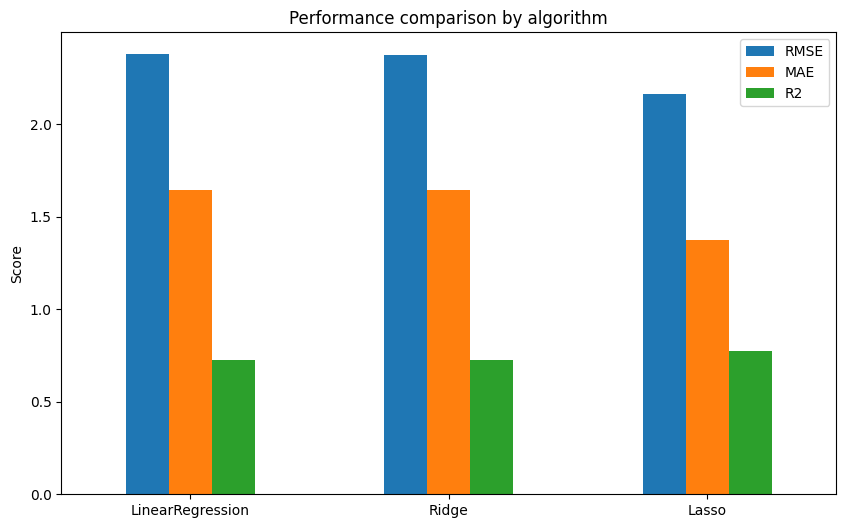

In [ ]:

# 성능지표 시각화
metrics = pd.DataFrame(results).T
metrics.plot(kind="bar", figsize=(10,6))
plt.title("Performance comparison by algorithm")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


# 5. 테스트 데이터 예측

In [ ]:
# R²가 가장 높은 모델 선택
best_name = max(results, key=lambda k: results[k]["R2"])
print("Best model by R²:", best_name)




Best model by R²: Lasso


## 최적 모델 : Lasso

In [ ]:
# 베스트 모델 재학습(선형계열은 모두 스케일 사용)
best_model = models[best_name]
best_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.1, random_state=42)

In [ ]:
# 테스트 예측
y_pred = best_model.predict(X_test_scaled)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 비교 테이블
compare_df = pd.DataFrame({
    "y_true(G3)": y_test.values,
    "y_pred(G3)": np.round(y_pred, 2)
})

# 성능 재계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"[{best_model}] RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")
compare_df.head(20)


[Lasso(alpha=0.1, random_state=42)] RMSE=2.161, MAE=1.375, R²=0.772


,y_true(G3),y_pred(G3)
0,10,6.63
1,12,11.44
2,5,3.30
3,10,8.60
4,9,8.22
5,13,12.44
6,18,18.73
7,6,6.95
8,0,7.46
9,14,12.69


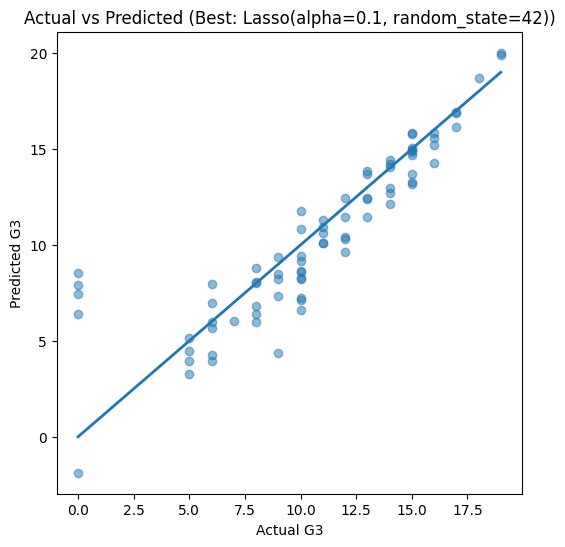

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2)  # y=x 기준선
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title(f"Actual vs Predicted (Best: {best_model})")
plt.show()


# 6. 예측모델 저장 & 불러오기

In [ ]:
# 저장
import joblib
joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

In [ ]:

# 불러오기
loaded_model = joblib.load("best_model.pkl")

In [ ]:
from sklearn.metrics import r2_score


y_loaded_pred = loaded_model.predict(X_test_scaled)

#  성능 확인
print("불러온 모델 성능 (R²):", r2_score(y_test, y_loaded_pred))

불러온 모델 성능 (R²): 0.7721802718574394
